
🔍 Scanning folder for images...

📂 Processing: imageservice (1).jpeg
📂 Processing: imageservice (10).jpeg
📂 Processing: imageservice (11).jpeg
📂 Processing: imageservice (12).jpeg
📂 Processing: imageservice (13).jpeg
📂 Processing: imageservice (14).jpeg
📂 Processing: imageservice (15).jpeg
📂 Processing: imageservice (16).jpeg
📂 Processing: imageservice (17).jpeg
📂 Processing: imageservice (18).jpeg
📂 Processing: imageservice (19).jpeg
📂 Processing: imageservice (2).jpeg
📂 Processing: imageservice (20).jpeg
📂 Processing: imageservice (21).jpeg
📂 Processing: imageservice (22).jpeg
📂 Processing: imageservice (23).jpeg
📂 Processing: imageservice (24).jpeg
📂 Processing: imageservice (25).jpeg
📂 Processing: imageservice (26).jpeg
📂 Processing: imageservice (27).jpeg
📂 Processing: imageservice (28).jpeg
📂 Processing: imageservice (29).jpeg
📂 Processing: imageservice (3).jpeg
📂 Processing: imageservice (30).jpeg
📂 Processing: imageservice (31).jpeg
📂 Processing: imageservice (32).jpeg
📂 Proce

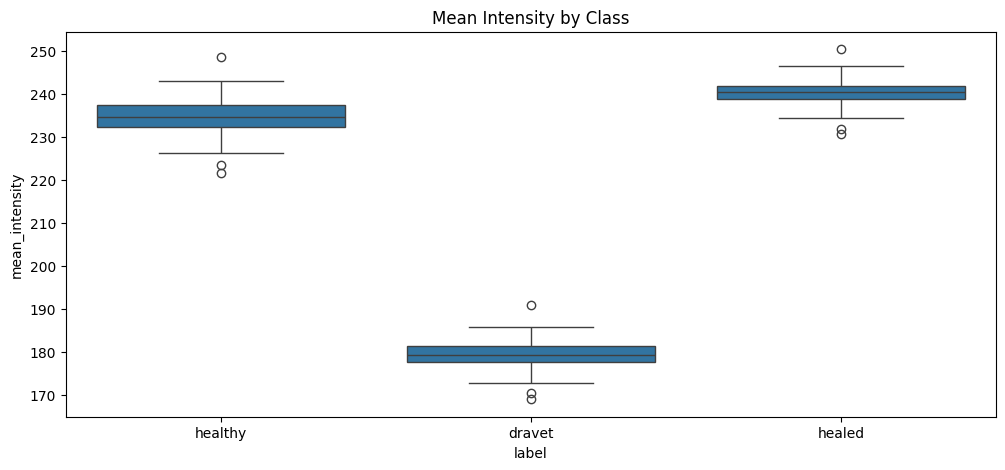

🧠 Classification Report:
               precision    recall  f1-score   support

      dravet       1.00      1.00      1.00        16
      healed       0.76      0.76      0.76        17
     healthy       0.76      0.76      0.76        17

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



In [7]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage import filters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns

# ✅ 1. Define paths
original_dir = r"C:\Users\ishsi\OneDrive\Desktop\scn1a"
dravet_dir = os.path.join(original_dir, "dravet")
healed_dir = os.path.join(original_dir, "healed")

os.makedirs(dravet_dir, exist_ok=True)
os.makedirs(healed_dir, exist_ok=True)

# ✅ 2. Feature extraction function
def extract_features(image):
    mean = np.mean(image)
    std = np.std(image)
    sobel = filters.sobel(image)
    edge_density = np.sum(sobel > 0.05) / sobel.size
    return {
        'mean_intensity': mean,
        'std_dev': std,
        'edge_density': edge_density
    }

# ✅ 3. Process each image
image_data = []

print("\n🔍 Scanning folder for images...\n")
for fname in os.listdir(original_dir):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        try:
            print(f"📂 Processing: {fname}")
            path = os.path.join(original_dir, fname)
            img = cv2.imread(path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Healthy
            features_orig = extract_features(gray)
            features_orig['label'] = 'healthy'
            image_data.append(features_orig)

            # Dravet
            dravet = gray.copy()
            dravet[:, :dravet.shape[1]//3] = dravet[:, :dravet.shape[1]//3] * 0.3
            dravet_path = os.path.join(dravet_dir, f"dravet_{fname}")
            cv2.imwrite(dravet_path, dravet)

            features_dravet = extract_features(dravet)
            features_dravet['label'] = 'dravet'
            image_data.append(features_dravet)

            # Healed
            healed = gray.copy()
            healed[:, :healed.shape[1]//3] = np.clip(healed[:, :healed.shape[1]//3] * 1.5, 0, 255)
            healed_path = os.path.join(healed_dir, f"healed_{fname}")
            cv2.imwrite(healed_path, healed)

            features_healed = extract_features(healed)
            features_healed['label'] = 'healed'
            image_data.append(features_healed)

        except Exception as e:
            print(f"❌ Failed on {fname}: {e}")

# ✅ 4. Convert to DataFrame
if image_data:
    df = pd.DataFrame(image_data)
    df['label'] = df['label'].astype(str)

    # Save
    features_csv = os.path.join(original_dir, "image_features.csv")
    df.to_csv(features_csv, index=False)
    print(f"\n✅ Features saved to: {features_csv}\n")

    # ✅ 5. Visualize
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='label', y='mean_intensity', data=df)
    plt.title("Mean Intensity by Class")
    plt.show()

    # ✅ 6. ML Classification
    X = df[['mean_intensity', 'std_dev', 'edge_density']]
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("🧠 Classification Report:\n", classification_report(y_test, y_pred))

else:
    print("⚠️ No images processed. Please check that files are not corrupt or empty.")



🔍 Scanning folder for images...

📂 Processing: imageservice (1).jpeg
📂 Processing: imageservice (10).jpeg
📂 Processing: imageservice (11).jpeg
📂 Processing: imageservice (12).jpeg
📂 Processing: imageservice (13).jpeg
📂 Processing: imageservice (14).jpeg
📂 Processing: imageservice (15).jpeg
📂 Processing: imageservice (16).jpeg
📂 Processing: imageservice (17).jpeg
📂 Processing: imageservice (18).jpeg
📂 Processing: imageservice (19).jpeg
📂 Processing: imageservice (2).jpeg
📂 Processing: imageservice (20).jpeg
📂 Processing: imageservice (21).jpeg
📂 Processing: imageservice (22).jpeg
📂 Processing: imageservice (23).jpeg
📂 Processing: imageservice (24).jpeg
📂 Processing: imageservice (25).jpeg
📂 Processing: imageservice (26).jpeg
📂 Processing: imageservice (27).jpeg
📂 Processing: imageservice (28).jpeg
📂 Processing: imageservice (29).jpeg
📂 Processing: imageservice (3).jpeg
📂 Processing: imageservice (30).jpeg
📂 Processing: imageservice (31).jpeg
📂 Processing: imageservice (32).jpeg
📂 Proce

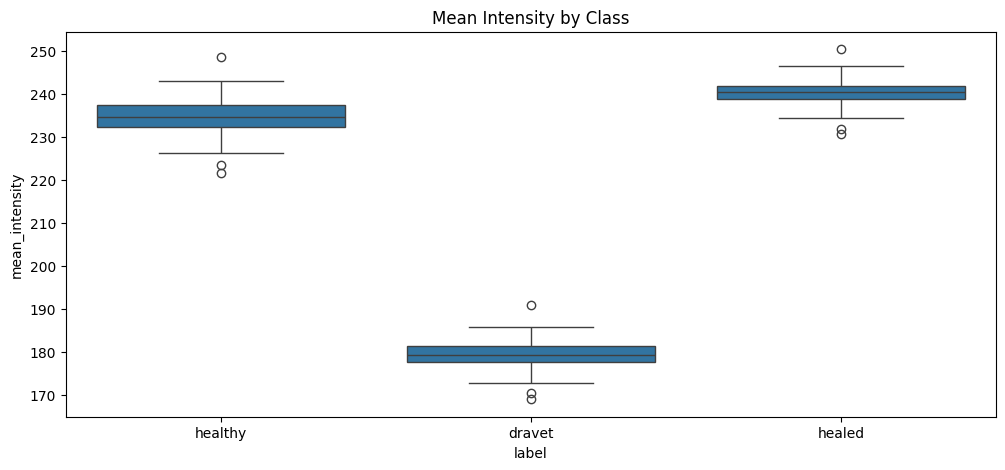

🧠 Classification Report:
               precision    recall  f1-score   support

      dravet       1.00      1.00      1.00        16
      healed       0.76      0.76      0.76        17
     healthy       0.76      0.76      0.76        17

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



In [9]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage import filters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns

# ✅ Folder paths
original_dir = r"C:\Users\ishsi\OneDrive\Desktop\scn1a"
dravet_dir = os.path.join(original_dir, "dravet")
healed_dir = os.path.join(original_dir, "healed")
os.makedirs(dravet_dir, exist_ok=True)
os.makedirs(healed_dir, exist_ok=True)

# ✅ Feature extraction
def extract_features(image_array):
    mean = np.mean(image_array)
    std = np.std(image_array)
    sobel = filters.sobel(image_array)
    edge_density = np.sum(sobel > 0.05) / sobel.size
    return {
        'mean_intensity': mean,
        'std_dev': std,
        'edge_density': edge_density
    }

# ✅ Main loop
image_data = []

print("\n🔍 Scanning folder for images...\n")
for fname in os.listdir(original_dir):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        try:
            print(f"📂 Processing: {fname}")
            path = os.path.join(original_dir, fname)
            img = Image.open(path).convert("L")  # convert to grayscale
            gray = np.array(img)

            # Healthy
            features_orig = extract_features(gray)
            features_orig['label'] = 'healthy'
            image_data.append(features_orig)

            # Dravet (dimmed left 1/3rd)
            dravet = gray.copy()
            dravet[:, :dravet.shape[1]//3] = dravet[:, :dravet.shape[1]//3] * 0.3
            Image.fromarray(dravet.astype(np.uint8)).save(os.path.join(dravet_dir, f"dravet_{fname}"))
            features_dravet = extract_features(dravet)
            features_dravet['label'] = 'dravet'
            image_data.append(features_dravet)

            # Healed (boosted left 1/3rd)
            healed = gray.copy()
            healed[:, :healed.shape[1]//3] = np.clip(healed[:, :healed.shape[1]//3] * 1.5, 0, 255)
            Image.fromarray(healed.astype(np.uint8)).save(os.path.join(healed_dir, f"healed_{fname}"))
            features_healed = extract_features(healed)
            features_healed['label'] = 'healed'
            image_data.append(features_healed)

        except Exception as e:
            print(f"❌ Error on {fname}: {e}")

# ✅ Build DataFrame + ML
if image_data:
    df = pd.DataFrame(image_data)
    df['label'] = df['label'].astype(str)

    features_csv = os.path.join(original_dir, "image_features.csv")
    df.to_csv(features_csv, index=False)
    print(f"\n✅ Features saved to: {features_csv}\n")

    # Visualize
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='label', y='mean_intensity', data=df)
    plt.title("Mean Intensity by Class")
    plt.show()

    # Train ML model
    X = df[['mean_intensity', 'std_dev', 'edge_density']]
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("🧠 Classification Report:\n", classification_report(y_test, y_pred))

else:
    print("⚠️ Still no images processed. Try manually confirming 1 image with PIL:")
    print("from PIL import Image\nimg = Image.open('yourfile.jpg').convert('L')\nimg.show()")



🔍 Scanning folder for images...

📂 Processing: imageservice (1).jpeg
❌ Error processing imageservice (1).jpeg: Cannot cast ufunc 'multiply' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'
📂 Processing: imageservice (10).jpeg
❌ Error processing imageservice (10).jpeg: Cannot cast ufunc 'multiply' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'
📂 Processing: imageservice (11).jpeg
❌ Error processing imageservice (11).jpeg: Cannot cast ufunc 'multiply' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'
📂 Processing: imageservice (12).jpeg
❌ Error processing imageservice (12).jpeg: Cannot cast ufunc 'multiply' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'
📂 Processing: imageservice (13).jpeg
❌ Error processing imageservice (13).jpeg: Cannot cast ufunc 'multiply' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'
📂 Processing: imageservice (14).jpeg
❌

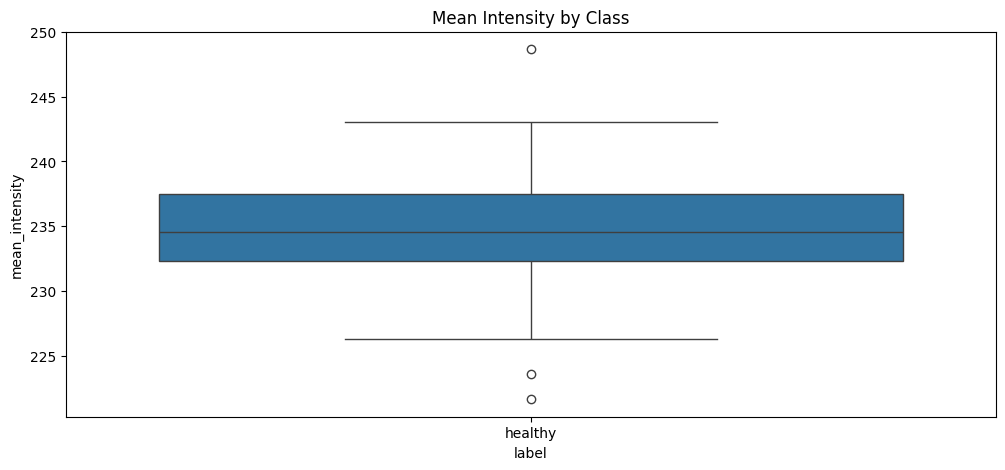

🧠 Classification Report:

              precision    recall  f1-score   support

     healthy       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [11]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage import filters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns

# ✅ Folder paths
original_dir = r"C:\Users\ishsi\OneDrive\Desktop\scn1a"
dravet_dir = os.path.join(original_dir, "dravet")
healed_dir = os.path.join(original_dir, "healed")
os.makedirs(dravet_dir, exist_ok=True)
os.makedirs(healed_dir, exist_ok=True)

# ✅ Feature extraction function
def extract_features(image_array):
    mean = np.mean(image_array)
    std = np.std(image_array)
    sobel = filters.sobel(image_array)
    edge_density = np.sum(sobel > 0.05) / sobel.size
    return {
        'mean_intensity': mean,
        'std_dev': std,
        'edge_density': edge_density
    }

# ✅ Main processing loop
image_data = []

print("\n🔍 Scanning folder for images...\n")
for fname in os.listdir(original_dir):
    file_path = os.path.join(original_dir, fname)
    
    # Skip subfolders
    if os.path.isdir(file_path):
        continue

    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        try:
            print(f"📂 Processing: {fname}")
            img = Image.open(file_path).convert("L")  # Convert to grayscale
            gray = np.array(img)

            # ➤ Healthy
            features_orig = extract_features(gray)
            features_orig['label'] = 'healthy'
            image_data.append(features_orig)

            # ➤ Dravet (dim left 1/3rd)
            dravet = gray.copy()
            dravet[:, :dravet.shape[1] // 3] *= 0.3
            dravet_path = os.path.join(dravet_dir, f"dravet_{fname}")
            Image.fromarray(dravet.astype(np.uint8)).save(dravet_path)
            features_dravet = extract_features(dravet)
            features_dravet['label'] = 'dravet'
            image_data.append(features_dravet)

            # ➤ Healed (brighten left 1/3rd)
            healed = gray.copy()
            healed[:, :healed.shape[1] // 3] = np.clip(healed[:, :healed.shape[1] // 3] * 1.5, 0, 255)
            healed_path = os.path.join(healed_dir, f"healed_{fname}")
            Image.fromarray(healed.astype(np.uint8)).save(healed_path)
            features_healed = extract_features(healed)
            features_healed['label'] = 'healed'
            image_data.append(features_healed)

        except Exception as e:
            print(f"❌ Error processing {fname}: {e}")

# ✅ Save features and run ML if any images were processed
if image_data:
    df = pd.DataFrame(image_data)
    df['label'] = df['label'].astype(str)

    features_csv = os.path.join(original_dir, "image_features.csv")
    df.to_csv(features_csv, index=False)
    print(f"\n✅ Features saved to: {features_csv}\n")

    # ➤ Boxplot visualization
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='label', y='mean_intensity', data=df)
    plt.title("Mean Intensity by Class")
    plt.show()

    # ➤ ML Classification
    X = df[['mean_intensity', 'std_dev', 'edge_density']]
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("🧠 Classification Report:\n")
    print(classification_report(y_test, y_pred))

else:
    print("⚠️ No images were processed. Please make sure your original SCN1A images are directly in the folder.")



🔍 Scanning folder for images...

📂 Processing: imageservice (1).jpeg
📂 Processing: imageservice (10).jpeg
📂 Processing: imageservice (11).jpeg
📂 Processing: imageservice (12).jpeg
📂 Processing: imageservice (13).jpeg
📂 Processing: imageservice (14).jpeg
📂 Processing: imageservice (15).jpeg
📂 Processing: imageservice (16).jpeg
📂 Processing: imageservice (17).jpeg
📂 Processing: imageservice (18).jpeg
📂 Processing: imageservice (19).jpeg
📂 Processing: imageservice (2).jpeg
📂 Processing: imageservice (20).jpeg
📂 Processing: imageservice (21).jpeg
📂 Processing: imageservice (22).jpeg
📂 Processing: imageservice (23).jpeg
📂 Processing: imageservice (24).jpeg
📂 Processing: imageservice (25).jpeg
📂 Processing: imageservice (26).jpeg
📂 Processing: imageservice (27).jpeg
📂 Processing: imageservice (28).jpeg
📂 Processing: imageservice (29).jpeg
📂 Processing: imageservice (3).jpeg
📂 Processing: imageservice (30).jpeg
📂 Processing: imageservice (31).jpeg
📂 Processing: imageservice (32).jpeg
📂 Proce

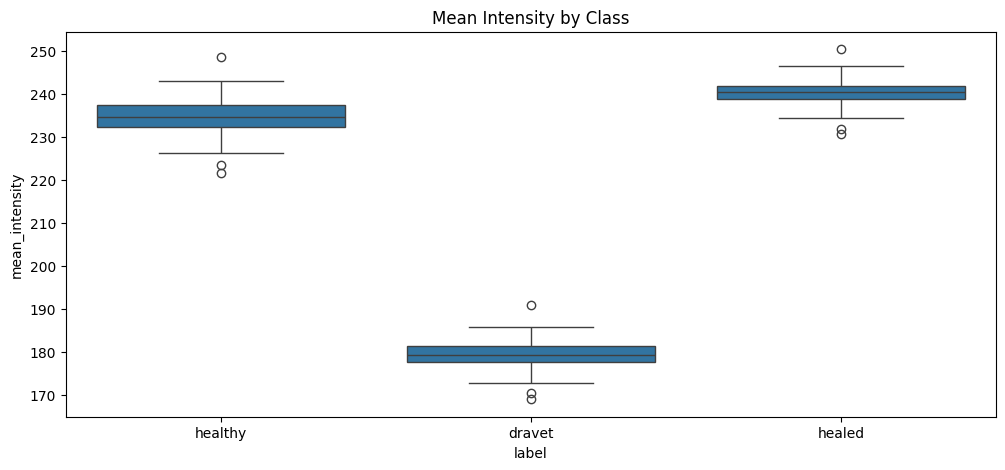


📊 Training Set Performance:
Accuracy       : 1.00
Precision (avg): 1.00
Recall (avg)   : 1.00
F1 Score (avg) : 1.00

📊 Test Set Performance:
Accuracy       : 0.84
Precision (avg): 0.84
Recall (avg)   : 0.84
F1 Score (avg) : 0.84

🧠 Classification Report:
               precision    recall  f1-score   support

      dravet       1.00      1.00      1.00        16
      healed       0.76      0.76      0.76        17
     healthy       0.76      0.76      0.76        17

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



In [13]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage import filters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import seaborn as sns

# ✅ Folder paths
original_dir = r"C:\Users\ishsi\OneDrive\Desktop\scn1a"
dravet_dir = os.path.join(original_dir, "dravet")
healed_dir = os.path.join(original_dir, "healed")
os.makedirs(dravet_dir, exist_ok=True)
os.makedirs(healed_dir, exist_ok=True)

# ✅ Feature extraction
def extract_features(image_array):
    mean = np.mean(image_array)
    std = np.std(image_array)
    sobel = filters.sobel(image_array)
    edge_density = np.sum(sobel > 0.05) / sobel.size
    return {
        'mean_intensity': mean,
        'std_dev': std,
        'edge_density': edge_density
    }

# ✅ Main loop
image_data = []

print("\n🔍 Scanning folder for images...\n")
for fname in os.listdir(original_dir):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        try:
            print(f"📂 Processing: {fname}")
            path = os.path.join(original_dir, fname)
            img = Image.open(path).convert("L")  # convert to grayscale
            gray = np.array(img)

            # Healthy
            features_orig = extract_features(gray)
            features_orig['label'] = 'healthy'
            image_data.append(features_orig)

            # Dravet (dimmed left 1/3rd)
            dravet = gray.copy()
            dravet[:, :dravet.shape[1]//3] = dravet[:, :dravet.shape[1]//3] * 0.3
            Image.fromarray(dravet.astype(np.uint8)).save(os.path.join(dravet_dir, f"dravet_{fname}"))
            features_dravet = extract_features(dravet)
            features_dravet['label'] = 'dravet'
            image_data.append(features_dravet)

            # Healed (boosted left 1/3rd)
            healed = gray.copy()
            healed[:, :healed.shape[1]//3] = np.clip(healed[:, :healed.shape[1]//3] * 1.5, 0, 255)
            Image.fromarray(healed.astype(np.uint8)).save(os.path.join(healed_dir, f"healed_{fname}"))
            features_healed = extract_features(healed)
            features_healed['label'] = 'healed'
            image_data.append(features_healed)

        except Exception as e:
            print(f"❌ Error on {fname}: {e}")

# ✅ Build DataFrame + ML
if image_data:
    df = pd.DataFrame(image_data)
    df['label'] = df['label'].astype(str)

    features_csv = os.path.join(original_dir, "image_features.csv")
    df.to_csv(features_csv, index=False)
    print(f"\n✅ Features saved to: {features_csv}\n")

    # Visualize
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='label', y='mean_intensity', data=df)
    plt.title("Mean Intensity by Class")
    plt.show()

    # Train ML model
    X = df[['mean_intensity', 'std_dev', 'edge_density']]
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=42, test_size=0.3
    )
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Training Metrics
    y_train_pred = model.predict(X_train)
    print("\n📊 Training Set Performance:")
    print(f"Accuracy       : {accuracy_score(y_train, y_train_pred):.2f}")
    print(f"Precision (avg): {precision_score(y_train, y_train_pred, average='macro'):.2f}")
    print(f"Recall (avg)   : {recall_score(y_train, y_train_pred, average='macro'):.2f}")
    print(f"F1 Score (avg) : {f1_score(y_train, y_train_pred, average='macro'):.2f}")

    # Test Metrics
    y_test_pred = model.predict(X_test)
    print("\n📊 Test Set Performance:")
    print(f"Accuracy       : {accuracy_score(y_test, y_test_pred):.2f}")
    print(f"Precision (avg): {precision_score(y_test, y_test_pred, average='macro'):.2f}")
    print(f"Recall (avg)   : {recall_score(y_test, y_test_pred, average='macro'):.2f}")
    print(f"F1 Score (avg) : {f1_score(y_test, y_test_pred, average='macro'):.2f}")
    print("\n🧠 Classification Report:\n", classification_report(y_test, y_test_pred))

else:
    print("⚠️ No image features extracted. Make sure your folder contains valid .jpeg or .png images.")



🔍 Scanning folder for images...

📂 Processing: imageservice (1).jpeg
📂 Processing: imageservice (10).jpeg
📂 Processing: imageservice (11).jpeg
📂 Processing: imageservice (12).jpeg
📂 Processing: imageservice (13).jpeg
📂 Processing: imageservice (14).jpeg
📂 Processing: imageservice (15).jpeg
📂 Processing: imageservice (16).jpeg
📂 Processing: imageservice (17).jpeg
📂 Processing: imageservice (18).jpeg
📂 Processing: imageservice (19).jpeg
📂 Processing: imageservice (2).jpeg
📂 Processing: imageservice (20).jpeg
📂 Processing: imageservice (21).jpeg
📂 Processing: imageservice (22).jpeg
📂 Processing: imageservice (23).jpeg
📂 Processing: imageservice (24).jpeg
📂 Processing: imageservice (25).jpeg
📂 Processing: imageservice (26).jpeg
📂 Processing: imageservice (27).jpeg
📂 Processing: imageservice (28).jpeg
📂 Processing: imageservice (29).jpeg
📂 Processing: imageservice (3).jpeg
📂 Processing: imageservice (30).jpeg
📂 Processing: imageservice (31).jpeg
📂 Processing: imageservice (32).jpeg
📂 Proce

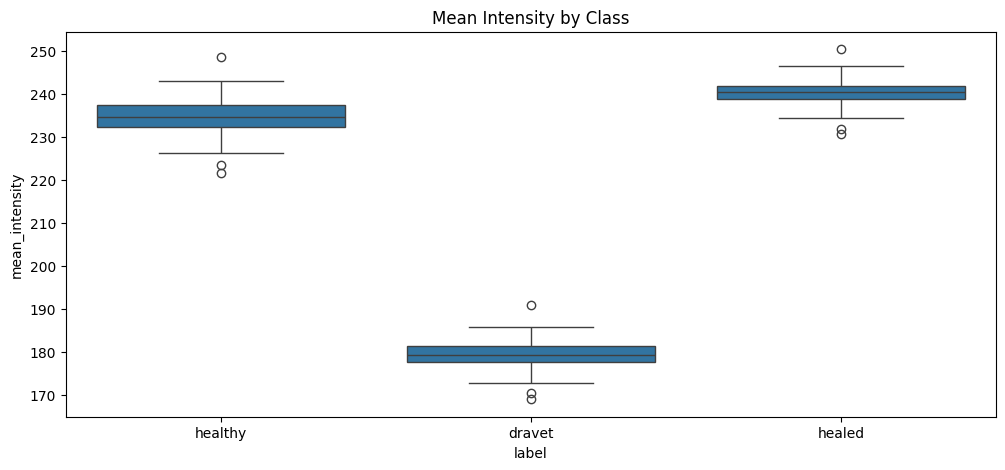


📊 Training Set Performance:
Accuracy       : 0.93
Precision (avg): 0.93
Recall (avg)   : 0.93
F1 Score (avg) : 0.93

📊 Test Set Performance:
Accuracy       : 0.78
Precision (avg): 0.78
Recall (avg)   : 0.78
F1 Score (avg) : 0.78

🧠 Classification Report:
               precision    recall  f1-score   support

      dravet       1.00      1.00      1.00        16
      healed       0.69      0.65      0.67        17
     healthy       0.67      0.71      0.69        17

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



In [15]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage import filters
from scipy.stats import skew, kurtosis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import seaborn as sns

# ✅ Folder paths
original_dir = r"C:\Users\ishsi\OneDrive\Desktop\scn1a"
dravet_dir = os.path.join(original_dir, "dravet")
healed_dir = os.path.join(original_dir, "healed")
os.makedirs(dravet_dir, exist_ok=True)
os.makedirs(healed_dir, exist_ok=True)

# ✅ Feature extraction with added stats
def extract_features(image_array):
    flat = image_array.flatten()
    sobel = filters.sobel(image_array)
    return {
        'mean_intensity': np.mean(flat),
        'std_dev': np.std(flat),
        'edge_density': np.sum(sobel > 0.05) / flat.size,
        'skewness': skew(flat),
        'kurtosis': kurtosis(flat)
    }

# ✅ Main loop
image_data = []
print("\n🔍 Scanning folder for images...\n")

for fname in os.listdir(original_dir):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        try:
            print(f"📂 Processing: {fname}")
            path = os.path.join(original_dir, fname)
            img = Image.open(path).convert("L")  # grayscale
            gray = np.array(img)

            # Healthy
            features_orig = extract_features(gray)
            features_orig['label'] = 'healthy'
            image_data.append(features_orig)

            # Dravet (dimmed left 1/3rd)
            dravet = gray.copy()
            dravet[:, :dravet.shape[1]//3] = dravet[:, :dravet.shape[1]//3] * 0.3
            Image.fromarray(dravet.astype(np.uint8)).save(os.path.join(dravet_dir, f"dravet_{fname}"))
            features_dravet = extract_features(dravet)
            features_dravet['label'] = 'dravet'
            image_data.append(features_dravet)

            # Healed (boosted left 1/3rd)
            healed = gray.copy()
            healed[:, :healed.shape[1]//3] = np.clip(healed[:, :healed.shape[1]//3] * 1.5, 0, 255)
            Image.fromarray(healed.astype(np.uint8)).save(os.path.join(healed_dir, f"healed_{fname}"))
            features_healed = extract_features(healed)
            features_healed['label'] = 'healed'
            image_data.append(features_healed)

        except Exception as e:
            print(f"❌ Error on {fname}: {e}")

# ✅ Build DataFrame + ML
if image_data:
    df = pd.DataFrame(image_data)
    df['label'] = df['label'].astype(str)

    features_csv = os.path.join(original_dir, "image_features.csv")
    df.to_csv(features_csv, index=False)
    print(f"\n✅ Features saved to: {features_csv}\n")

    # Visualize
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='label', y='mean_intensity', data=df)
    plt.title("Mean Intensity by Class")
    plt.show()

    # Features + labels
    feature_cols = ['mean_intensity', 'std_dev', 'edge_density', 'skewness', 'kurtosis']
    X = df[feature_cols]
    y = df['label']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=42, test_size=0.3
    )

    # 🎯 Regularized Random Forest
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_leaf=4,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Training Metrics
    y_train_pred = model.predict(X_train)
    print("\n📊 Training Set Performance:")
    print(f"Accuracy       : {accuracy_score(y_train, y_train_pred):.2f}")
    print(f"Precision (avg): {precision_score(y_train, y_train_pred, average='macro'):.2f}")
    print(f"Recall (avg)   : {recall_score(y_train, y_train_pred, average='macro'):.2f}")
    print(f"F1 Score (avg) : {f1_score(y_train, y_train_pred, average='macro'):.2f}")

    # Test Metrics
    y_test_pred = model.predict(X_test)
    print("\n📊 Test Set Performance:")
    print(f"Accuracy       : {accuracy_score(y_test, y_test_pred):.2f}")
    print(f"Precision (avg): {precision_score(y_test, y_test_pred, average='macro'):.2f}")
    print(f"Recall (avg)   : {recall_score(y_test, y_test_pred, average='macro'):.2f}")
    print(f"F1 Score (avg) : {f1_score(y_test, y_test_pred, average='macro'):.2f}")
    print("\n🧠 Classification Report:\n", classification_report(y_test, y_test_pred))

else:
    print("⚠️ No image features extracted. Make sure your folder contains valid .jpeg or .png images.")
